# Scraped Cargoes API Example

## Run this example in [Colab](https://colab.research.google.com/github/SignalOceanSdk/SignalSDK/blob/master/docs/examples/jupyter/ScrapedCargoesAPI/Scraped%20Cargoes%20API%20Example.ipynb)

Get your personal Signal Ocean API subscription key (acquired [here](https://apis.signalocean.com/profile)) and replace it below:

In [1]:
signal_ocean_api_key = '' # Replace with your subscription key

# Scraped Cargoes API

The goal of Scraped Cargoes API is to collect and return scraped cargoes by the given filters. This can be done by using the `ScrapedCargoesAPI` class and calling appropriate methods

#### 1. Request by filters

Cargoes can be retrieved for specific filters, by calling the `get_cargoes` method with the following arguments:

#### Required

`vessel_type` The vessel type

_Additionally, at least one of the following is required_

`cargo_ids` List of CargoIDs

`message_ids` List of MessageIDs

`external_message_ids` List of ExternalMessageIDs

`received_date_from` Earliest date the cargo received

`received_date_to` Latest date the cargo received

`updated_date_from` Earliest date the cargo updated

`updated_date_to` Latest date the cargo updated

> Mixing received and updated dates is not allowed

> It's highly recommended to use UTC  dates, since this is the internally used format


#### 2. Request by page token

Cargoes can also be retrieved, by calling the `get_cargoes_incremental` method.
This method will also return `next_request_token`, which the user should use to their next incremental request to retrieve only the latest updated cargoes.

#### Required

`vessel_type` The vessel type

#### Optional

`page_token` The key that should be used as a parameter of the token to retrieve the relevant page.

#### 3. Retrieve page token

The token referenced above can be retrieved for a specific date, by calling the `get_cargoes_incremental_token` method with the following argument:
#### Required

`updated_date_from` Earliest date the cargo updated



### Additional optional arguments

Methods `get_cargoes` and `get_cargoes_incremental`, also accept the following optional arguments:

`include_details` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
parsed_part_id, line_from, line_to, in_line_order, source
```

`include_scraped_fields` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
scraped_laycan, scraped_load, scraped_load2, scraped_discharge, scraped_discharge_options, scraped_discharge2, scraped_charterer, scraped_cargo_type, scraped_quantity, scraped_delivery_date, scraped_delivery_from, scraped_delivery_to, 
scraped_redelivery_from, scraped_redelivery_to
```

`include_labels` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
load_name, load_taxonomy, load_name2, load_taxonomy2, discharge_name, discharge_taxonomy, discharge_name2, discharge_taxonomy2, charterer, cargo_type, cargo_type_group, delivery_from_name, delivery_from_taxonomy, delivery_to_name, delivery_to_taxonomy, redelivery_from_name, redelivery_from_taxonomy, redelivery_to_name, redelivery_to_taxonomy, charter_type, cargo_status
```

`include_content` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
content
```

`include_sender` If this field is `True` the following columns will be included in the response (otherwise they will be `None`): 
```
sender
```

`include_debug_info` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
is_private
```

> Default value is `True` for the arguments described above 

## Installation

To install _Signal Ocean SDK_, simply run the following command

In [2]:
%%capture
%pip install signal-ocean

## Quickstart

Import `signal-ocean` and other modules required for this demo

In [3]:
from signal_ocean import Connection
from signal_ocean.scraped_cargoes import ScrapedCargoesAPI, ScrapedCargo

from datetime import datetime, timedelta
import pandas as pd
import plotly.graph_objects as go

Create a new instance of the `ScrapedCargoesAPI` class

In [4]:
connection = Connection(signal_ocean_api_key)
api = ScrapedCargoesAPI(connection)

Now you are ready to retrieve your data

#### Request by date

To get all tanker cargoes received the last 4 days, you must declare appropriate `vessel_type` and `received_date_from` variables

In [5]:
vessel_type = 1  # Tanker
received_date_from = datetime.utcnow() - timedelta(days=4)

And then call `get_cargoes` method, as below

In [6]:
scraped_cargoes = api.get_cargoes(
    vessel_type=vessel_type,
    received_date_from=received_date_from,
)

next(iter(scraped_cargoes), None)

ScrapedCargo(cargo_id=45442083, message_id=69570386, external_message_id=None, parsed_part_id=74686406, line_from=80, line_to=80, in_line_order=None, source='Email', updated_date=datetime.datetime(2024, 7, 29, 9, 16, 43, tzinfo=datetime.timezone.utc), received_date=datetime.datetime(2024, 7, 29, 9, 15, 42, tzinfo=datetime.timezone.utc), is_deleted=False, low_confidence=False, scraped_laycan='07-08/aug', laycan_from=datetime.datetime(2024, 8, 7, 0, 0, tzinfo=datetime.timezone.utc), laycan_to=datetime.datetime(2024, 8, 8, 0, 0, tzinfo=datetime.timezone.utc), scraped_load='ag', load_geo_id=24777, load_name='Arabian Gulf', load_taxonomy_id=4, load_taxonomy='Level0', scraped_load2=None, load_geo_id2=None, load_name2=None, load_taxonomy_id2=None, load_taxonomy2=None, scraped_discharge='japan', scraped_discharge_options=None, discharge_geo_id=121, discharge_name='Japan', discharge_taxonomy_id=3, discharge_taxonomy='Country', scraped_discharge2=None, discharge_geo_id2=None, discharge_name2=Non

For better visualization, it's convenient to insert data into a DataFrame

In [7]:
df = pd.DataFrame(scraped_cargoes)

df.head()

,cargo_id,message_id,external_message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,...,redelivery_to_taxonomy_id,redelivery_to_taxonomy,charter_type_id,charter_type,cargo_status_id,cargo_status,content,subject,sender,is_private
0,45442083,69570386,None,74686406,80,80,NaN,Email,2024-07-29 09:16:43+00:00,2024-07-29 09:15:42+00:00,...,NaN,None,0,Voyage,NaN,None,07-08/aug shell ag japan 75 naf o/p proteus ha...,McQuilling Asia - Clean East Daily Market Repo...,McQuilling,True
1,45442084,69570386,None,74686406,58,58,1.0,Email,2024-07-29 09:16:43+00:00,2024-07-29 09:15:42+00:00,...,NaN,None,0,Voyage,0.0,OnSubs,01-02/aug ats taiwan spore-ag 60 um s 850k-14m...,McQuilling Asia - Clean East Daily Market Repo...,McQuilling,True
2,45442085,69570386,None,74686406,51,51,NaN,Email,2024-07-29 09:16:43+00:00,2024-07-29 09:15:42+00:00,...,NaN,None,0,Voyage,0.0,OnSubs,5-aug bf muara spore 35 cpf 285k daian subs,McQuilling Asia - Clean East Daily Market Repo...,McQuilling,True
3,45442086,69570386,None,74686406,41,41,NaN,Email,2024-07-29 09:16:43+00:00,2024-07-29 09:15:42+00:00,...,NaN,None,0,Voyage,0.0,OnSubs,03-05/aug marubeni korea japan 35 um s rnr ten...,McQuilling Asia - Clean East Daily Market Repo...,McQuilling,True
4,45442087,69570386,None,74686406,58,58,NaN,Email,2024-07-29 09:16:43+00:00,2024-07-29 09:15:42+00:00,...,NaN,None,0,Voyage,0.0,OnSubs,01-02/aug ats taiwan spore-ag 60 um s 850k-14m...,McQuilling Asia - Clean East Daily Market Repo...,McQuilling,True


#### Request by Message or ExternalMessage IDs

To retrieve cargoes for particular message ID(s), you should include an extra parameter called `message_ids` when using the `get_cargoes` method. This parameter should contain a list of message IDs. For instance,

In [8]:
message_ids = [69320619,69201092,69216273,69274650,69314539]
scraped_cargoes_by_message_ids = api.get_cargoes(
    vessel_type=vessel_type,
    message_ids=message_ids,
)

next(iter(scraped_cargoes_by_message_ids), None)

ScrapedCargo(cargo_id=45279461, message_id=69201092, external_message_id=None, parsed_part_id=74439682, line_from=71, line_to=71, in_line_order=None, source='Email', updated_date=datetime.datetime(2024, 7, 24, 4, 32, 16, tzinfo=datetime.timezone.utc), received_date=datetime.datetime(2024, 7, 24, 4, 30, tzinfo=datetime.timezone.utc), is_deleted=False, low_confidence=False, scraped_laycan='26-27 aug', laycan_from=datetime.datetime(2024, 8, 26, 0, 0, tzinfo=datetime.timezone.utc), laycan_to=datetime.datetime(2024, 8, 27, 0, 0, tzinfo=datetime.timezone.utc), scraped_load='balikpapan', load_geo_id=3486, load_name='Balikpapan', load_taxonomy_id=2, load_taxonomy='Port', scraped_load2=None, load_geo_id2=None, load_name2=None, load_taxonomy_id2=None, load_taxonomy2=None, scraped_discharge='opts', scraped_discharge_options=None, discharge_geo_id=None, discharge_name=None, discharge_taxonomy_id=None, discharge_taxonomy=None, scraped_discharge2=None, discharge_geo_id2=None, discharge_name2=None, d

You can achieve a similar result for external message IDs by providing an argument called `external_message_ids`.

#### Request by Cargo IDs

To retrieve cargoes for particular cargo ID(s), you should include an extra parameter called `cargo_ids` when using the `get_cargoes` method.
This parameter should contain a list of cargo IDs. For instance,

In [9]:
cargo_ids = [45336637,45336638,45336639,45336640,45336641]    # Or add a list of your desired cargo IDs

scraped_cargoes_by_ids = api.get_cargoes(
    vessel_type=vessel_type,
    cargo_ids=cargo_ids,
)

df_by_ids = pd.DataFrame(scraped_cargoes_by_ids)
df_by_ids.head()

,cargo_id,message_id,external_message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,...,redelivery_to_taxonomy_id,redelivery_to_taxonomy,charter_type_id,charter_type,cargo_status_id,cargo_status,content,subject,sender,is_private
0,45336637,69320619,None,74519826,124,124,None,Email,2024-07-25 05:33:57+00:00,2024-07-25 05:30:18+00:00,...,None,None,0,Voyage,None,None,tender 200 kb mfo dumai opts 23-24 aug clsd,SHIPLINKS EAST OF SUEZ DIRTY MARKET REPORT (25...,ShipLinks,True
1,45336638,69320619,None,74519826,119,119,None,Email,2024-07-25 05:33:57+00:00,2024-07-25 05:30:18+00:00,...,None,None,0,Voyage,None,None,tender 200 kb v1250 sungai pakning opts 02-03 ...,SHIPLINKS EAST OF SUEZ DIRTY MARKET REPORT (25...,ShipLinks,True
2,45336639,69320619,None,74519826,120,120,None,Email,2024-07-25 05:33:57+00:00,2024-07-25 05:30:18+00:00,...,None,None,0,Voyage,None,None,tender 200 kb v1250 sungai pakning opts 13-14 ...,SHIPLINKS EAST OF SUEZ DIRTY MARKET REPORT (25...,ShipLinks,True
3,45336640,69320619,None,74519825,103,103,None,Email,2024-07-25 05:33:57+00:00,2024-07-25 05:30:18+00:00,...,None,None,0,Voyage,None,None,tender 200 kb mfo cilacap opts 21-22 aug clsd,SHIPLINKS EAST OF SUEZ DIRTY MARKET REPORT (25...,ShipLinks,True
4,45336641,69320619,None,74519825,102,102,None,Email,2024-07-25 05:33:57+00:00,2024-07-25 05:30:18+00:00,...,None,None,0,Voyage,None,None,tender 200 kb v1250 sungai pakning opts 26-27 ...,SHIPLINKS EAST OF SUEZ DIRTY MARKET REPORT (25...,ShipLinks,True


#### Retrieve incremental token
The `get_cargoes_incremental_token` allows retrieval of `page_token` by adding the `updated_date_from` value.
This `page_token` can be used as a variable to the `get_cargoes_incremental` method, in order to retrieve only new or updated cargoes.

For instance, to retrieve the relevant page token for last week's data, you must call the `get_cargoes_incremental_token`, as below

In [10]:
updated_date_from = datetime.utcnow() - timedelta(days=7)
page_token = api.get_cargoes_incremental_token(
    updated_date_from=updated_date_from,
)

page_token

'MjAyNC0wNy0yNlQwODo0NzoyMy4wMDBa'

#### Request by page token

If the `page_token` parameter is not specified, the `get_cargoes_incremental` method will retrieve all cargoes. You can call the `get_cargoes_incremental` method, as below

In [11]:
scraped_cargoes_incremental = api.get_cargoes_incremental(
    vessel_type=vessel_type,
    page_token=page_token,
)

df_by_ids = pd.DataFrame(scraped_cargoes_incremental.data)
df_by_ids.head()

,cargo_id,message_id,external_message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,...,redelivery_to_taxonomy_id,redelivery_to_taxonomy,charter_type_id,charter_type,cargo_status_id,cargo_status,content,subject,sender,is_private
0,45396552,69453094,None,74606440.0,41.0,41.0,NaN,Email,2024-07-26 09:10:02+00:00,2024-07-26 09:08:58+00:00,...,NaN,None,0.0,Voyage,NaN,None,repsol 130 12-aug nhc sankofa spain 90ws popi p -,DA' OCEANIC SHIPPING - DAILY DPP MARKET REPORT...,Da'oceanic Shipping,True
1,45397078,69454207,None,74607105.0,203.0,203.0,NaN,Email,2024-07-26 09:20:30+00:00,2024-07-26 09:19:24+00:00,...,NaN,None,0.0,Voyage,NaN,None,equinor mongstad trans-atlantic 210ws green sky -,DA' OCEANIC SHIPPING - WEEKLY CPP MARKET REPOR...,Da'oceanic Shipping,True
2,45397079,69454207,None,74607105.0,91.0,91.0,NaN,Email,2024-07-26 09:20:30+00:00,2024-07-26 09:19:24+00:00,...,NaN,None,0.0,Voyage,NaN,None,kpc kuwait pakistan $595k em zenith -,DA' OCEANIC SHIPPING - WEEKLY CPP MARKET REPOR...,Da'oceanic Shipping,True
3,45397080,69454207,None,74607105.0,61.0,61.0,1.0,Email,2024-07-26 09:20:30+00:00,2024-07-26 09:19:24+00:00,...,NaN,None,0.0,Voyage,NaN,None,reliance sikka ukc-usac $4.30-4.75m hafnia yar...,DA' OCEANIC SHIPPING - WEEKLY CPP MARKET REPOR...,Da'oceanic Shipping,True
4,45397081,69454207,None,74607105.0,226.0,226.0,NaN,Email,2024-07-26 09:20:30+00:00,2024-07-26 09:19:24+00:00,...,NaN,None,0.0,Voyage,NaN,None,maersk usg opts own fpmc 36 -,DA' OCEANIC SHIPPING - WEEKLY CPP MARKET REPOR...,Da'oceanic Shipping,True


Also, the `get_cargoes_incremental` method will retrieve the `next_request_token`, which should be used as the `page_token` for the next incremental call and retrieve only new or updated cargoes.

In [12]:
next_request_token = scraped_cargoes_incremental.next_request_token

next_request_token

'MjAyNC0wOC0wMlQwODo0NzoyNC4xNDha'

#### Usage of optional arguments

By default, all fields are returned. In many cases, it is convenient to select specific columns. For example, if we want to compare scraped and mapped fields

In [13]:
scraped_mapped_columns = [
    'scraped_charterer',
    'charterer',
    'scraped_quantity',
    'quantity',
    'scraped_load',
    'load_name',
]

scraped_mapped_df = pd.DataFrame(scraped_cargoes, columns=scraped_mapped_columns)

scraped_mapped_df.head()

,scraped_charterer,charterer,scraped_quantity,quantity,scraped_load,load_name
0,shell,Shell,75,75000.0,ag,Arabian Gulf
1,lr,None,60,60000.0,ats taiwan,Taiwan
2,None,None,35,35000.0,muara,Muara
3,None,None,35,35000.0,marubeni korea,"Korea, Republic of"
4,lr,None,60,60000.0,ats taiwan,Taiwan


## Examples

Let's start by fetching all tanker cargoes received the last 2 weeks

In [14]:
example_vessel_type = 1  # Tanker
example_date_from = datetime.utcnow() - timedelta(days=14)

example_scraped_cargoes = api.get_cargoes(
   vessel_type=example_vessel_type,
   received_date_from=example_date_from,
)

#### Exclude deleted scraped cargoes

The `is_deleted` property of a scraped cargo indicates whether it is valid or not. If it is set to `True`, the corresponding `cargo_id` has been replaced by a new one.

For the sake of completeness, we will exclude deleted scraped cargoes in the following examples

In [15]:
example_scraped_cargoes = [cargo for cargo in example_scraped_cargoes if not cargo.is_deleted]

next(iter(example_scraped_cargoes), None)

ScrapedCargo(cargo_id=45136695, message_id=68888739, external_message_id=None, parsed_part_id=74227216, line_from=26, line_to=26, in_line_order=None, source='Email', updated_date=datetime.datetime(2024, 7, 19, 9, 14, 26, tzinfo=datetime.timezone.utc), received_date=datetime.datetime(2024, 7, 19, 9, 9, 22, tzinfo=datetime.timezone.utc), is_deleted=False, low_confidence=False, scraped_laycan='20-25/8', laycan_from=datetime.datetime(2024, 8, 20, 0, 0, tzinfo=datetime.timezone.utc), laycan_to=datetime.datetime(2024, 8, 25, 0, 0, tzinfo=datetime.timezone.utc), scraped_load='usg', load_geo_id=24676, load_name='US Gulf', load_taxonomy_id=4, load_taxonomy='Level0', scraped_load2=None, load_geo_id2=None, load_name2=None, load_taxonomy_id2=None, load_taxonomy2=None, scraped_discharge='ulsan', scraped_discharge_options=None, discharge_geo_id=3602, discharge_name='Ulsan', discharge_taxonomy_id=2, discharge_taxonomy='Port', scraped_discharge2=None, discharge_geo_id2=None, discharge_name2=None, disc

Now, we are ready to insert our data into a dataframe and keep only specific fields

In [16]:
example_columns = [
    'charterer',   
    'laycan_from',
    'load_name',
    'quantity',
    'is_deleted',
]

data = pd.DataFrame(example_scraped_cargoes, columns=example_columns)

data.head()

,charterer,laycan_from,load_name,quantity,is_deleted
0,SK,2024-08-20 00:00:00+00:00,US Gulf,270000.0,False
1,Equinor,2024-08-20 00:00:00+00:00,US Gulf,270000.0,False
2,Equinor,2024-08-20 00:00:00+00:00,US Gulf,270000.0,False
3,Petco Chartering,2024-08-01 00:00:00+00:00,Arabian Gulf,270000.0,False
4,BP,2024-08-04 00:00:00+00:00,Jebel Dhanna,270000.0,False


#### Top 10 Charterers

In this example, we will find the top 10 Charterers, based on the number of distinct available cargoes

In [17]:
top_chrtr_ser = data[['charterer', 'laycan_from']].drop_duplicates().charterer.value_counts().head(10)

top_chrtr_df = top_chrtr_ser.to_frame(name='CargoCount').reset_index().rename(columns={'index': 'Charterer'})

top_chrtr_df

,charterer,CargoCount
0,Aramco Trading Company,30
1,Vitol,27
2,Shell,22
3,Unipec,21
4,BP,20
5,Trafigura,16
6,CSSA,16
7,ExxonMobil,15
8,ADMIC,15
9,Indian Oil,14


And display results in a bar plot

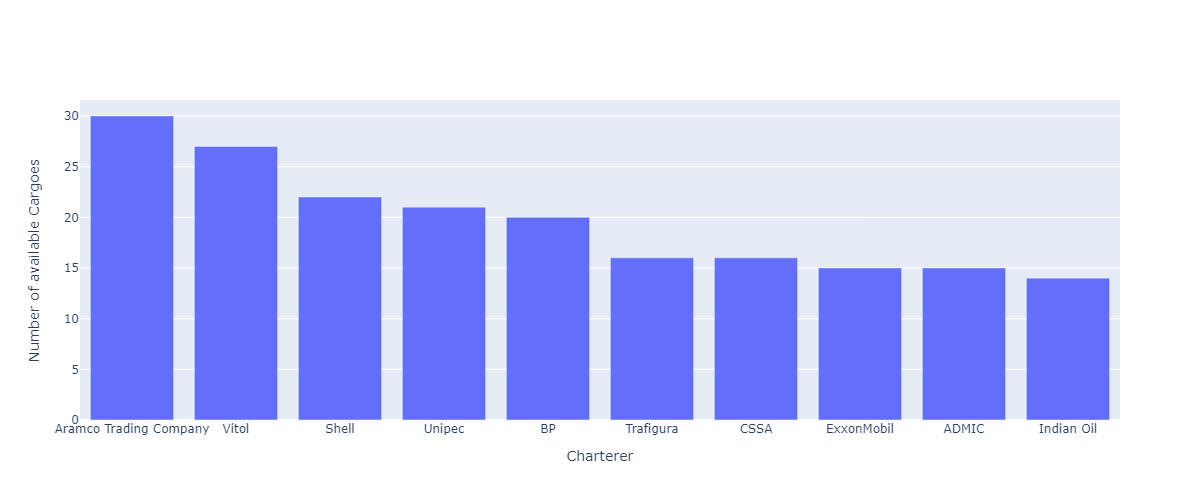

In [18]:
top_chrtr_fig = go.Figure()

bar = go.Bar(
    x=top_chrtr_df.charterer.tolist(),
    y=top_chrtr_df.CargoCount.tolist(),
)

top_chrtr_fig.add_trace(bar)
top_chrtr_fig.update_xaxes(title_text="Charterer")
top_chrtr_fig.update_yaxes(title_text="Number of available Cargoes")
top_chrtr_fig.show()

#### Total quantity to load in specific areas per day the next week

In [19]:
this_week_days = pd.date_range(start=datetime.utcnow().date(), freq='D', periods=7, tz='UTC')
areas = data[data.load_name.notna()].load_name.value_counts().head().index.tolist()

areas

['US Gulf', 'Arabian Gulf', 'Singapore', 'Mumbai', 'Sikka']

Create the pivot table

In [20]:
areas_mask = data.load_name.isin(areas) & data.laycan_from.isin(this_week_days)

df_areas = data[areas_mask]

df_pivot = pd.pivot_table(
    df_areas,
    columns='load_name',
    index='laycan_from',
    values='quantity',
    aggfunc=pd.Series.sum,
    fill_value=0,
).reindex(index=this_week_days, fill_value=0).reset_index().rename(columns={'index': 'laycan_from'})

df_pivot

load_name,laycan_from,Arabian Gulf,Mumbai,Sikka,Singapore,US Gulf
0,2024-08-02 00:00:00+00:00,2480000,0,0,240000,2014000
1,2024-08-03 00:00:00+00:00,1350000,0,960000,140000,3184000
2,2024-08-04 00:00:00+00:00,1585000,0,120000,3440000,76000
3,2024-08-05 00:00:00+00:00,1605000,1140000,0,1040000,1662000
4,2024-08-06 00:00:00+00:00,2865000,650000,70000,360000,1232000
5,2024-08-07 00:00:00+00:00,1165000,0,0,480000,4536000
6,2024-08-08 00:00:00+00:00,4310000,30000,210000,885960,178000


And display the results as timeseries

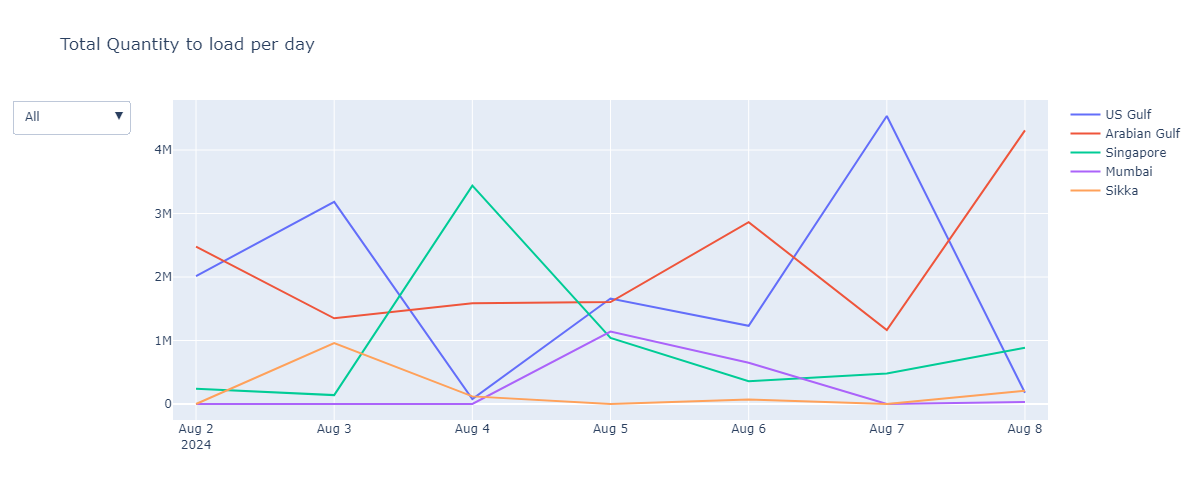

In [21]:
def area_button(area):
    args = [
        {'visible': [i == areas.index(area) for i in range(len(areas))]},
        {
            'title': f'Total Quantity to load in {area} per day',
            'showlegend': True
        },
    ]
    
    return dict(
        label=area,
        method='update',
        args=args,
    )

title = 'Total Quantity to load per day'
today = datetime.combine(datetime.utcnow().date(), datetime.min.time())

areas_fig = go.Figure()

area_buttons = []

for area in areas:
    if area not in df_pivot.columns:
        continue
    area_scatter_plot = go.Scatter(    
        x=df_pivot.laycan_from,
        y=df_pivot[area],
        name=area,
        mode='lines',
    )

    areas_fig.add_trace(area_scatter_plot)
    
    area_buttons.append(area_button(area))
    
buttons = list([
    dict(
        label='All',
        method='update',
        args=[    
            {'visible': [True for _ in range(len(areas))]},
            {
                'title': title,
                'showlegend': True
            }
        ],
    ),
    *area_buttons,
])

areas_fig.update_layout(
    title=title,
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=buttons,
    )],
    xaxis_range=[today - timedelta(hours=4), today + timedelta(hours=24*6 + 4)],
)

areas_fig.show()

#### Export data to csv

In [22]:
output_path = '' # Change output_path with your path
filename = 'last_two_weeks_cargoes.csv'
if not data.empty:
    data.to_csv(output_path+filename, index=False)